In [1]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('Housing.csv')
cat_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
cat_df = pd.get_dummies(df[cat_cols])
xdf = pd.concat([df.drop(cat_cols, axis=1), cat_df], axis=1)
y = xdf['price']
X = xdf.drop(['price'], axis=1)
xdf.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0,1,1,0,...,0,1,0,0,1,0,1,1,0,0
1,12250000,8960,4,4,4,3,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0
2,12250000,9960,3,2,2,2,0,1,1,0,...,1,1,0,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,3,0,1,1,0,...,1,1,0,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,0,1,0,1,...,1,1,0,0,1,1,0,1,0,0


In [3]:
skb = SelectKBest(f_regression, k=13).fit(X, y)

In [4]:
X.columns[skb.get_support()]

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_no',
       'mainroad_yes', 'guestroom_yes', 'airconditioning_no',
       'airconditioning_yes', 'prefarea_no', 'prefarea_yes',
       'furnishingstatus_unfurnished'],
      dtype='object')

In [5]:
X.var(axis=0).sort_values(ascending=False)[:13]

area                               4.709512e+06
stories                            7.525432e-01
parking                            7.423300e-01
bedrooms                           5.447383e-01
bathrooms                          2.524757e-01
furnishingstatus_semi-furnished    2.434768e-01
basement_no                        2.280559e-01
basement_yes                       2.280559e-01
furnishingstatus_unfurnished       2.203386e-01
airconditioning_no                 2.163923e-01
airconditioning_yes                2.163923e-01
furnishingstatus_furnished         1.912439e-01
prefarea_no                        1.800324e-01
dtype: float64

<AxesSubplot:>

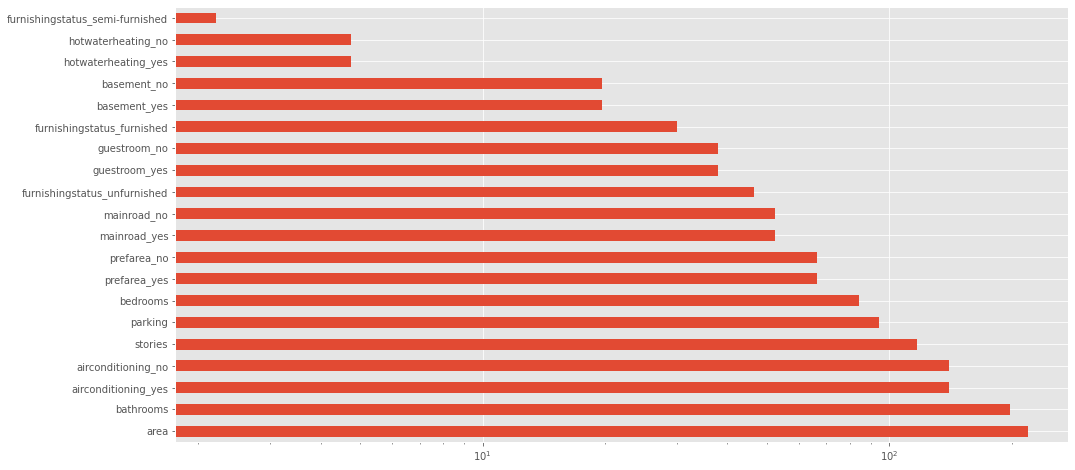

In [6]:
fig, ax = plt.subplots(figsize=(16, 8))

pd.Series(skb.scores_, index=X.columns).sort_values(ascending=False).plot(kind='barh', logx=True, ax=ax)

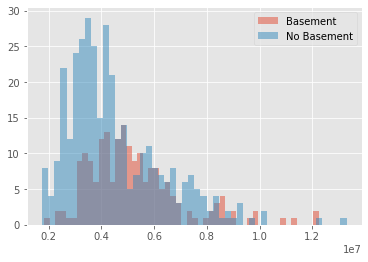

In [7]:
has_basement = y[X['basement_yes'] == 1]
no_basement = y[X['basement_no'] == 1]
ax = has_basement.hist(bins=50, alpha=0.5, label='Basement')
no_basement.hist(bins=50, alpha=0.5, label='No Basement', ax=ax)
plt.legend()

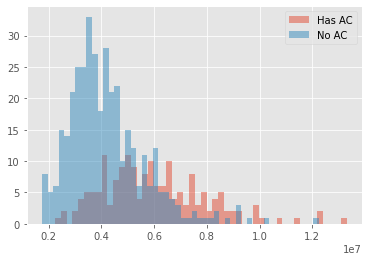

In [8]:
has_ac = y[X['airconditioning_yes'] == 1]
no_ac = y[X['airconditioning_no'] == 1]
ax = has_ac.hist(bins=50, alpha=0.5, label='Has AC')
no_ac.hist(bins=50, alpha=0.5, label='No AC', ax=ax)
plt.legend()

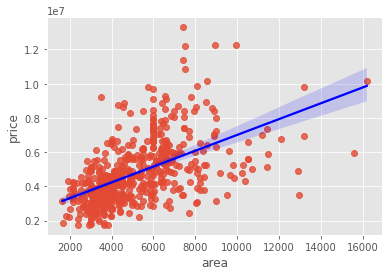

In [9]:
import seaborn as sns

sns.regplot(x="area", y="price", data=df, line_kws={'color': 'blue'});